In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv("laptop.csv")

In [4]:
df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


### **DataFrame Checking**

In [5]:
print(f"duplicate data: {df.duplicated().sum()}")
df[df.duplicated]

duplicate data: 0


,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price


In [6]:
df.isna().sum()

Brand               0
Processor_Speed     0
RAM_Size            0
Storage_Capacity    0
Screen_Size         0
Weight              0
Price               0
dtype: int64

### **Data Checking**

#### **Descriptive Statistics**

In [7]:
# Numerical Column

df.describe()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948
50%,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878
75%,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037


In [8]:
# Categorical Value
print(df.describe(include='object'))
print(f"\n")
print(df['Brand'].value_counts())

       Brand
count   1000
unique     5
top     Dell
freq     210


Brand
Dell      210
Asus      206
Acer      204
Lenovo    190
HP        190
Name: count, dtype: int64


#### **Univariate Analysis**

##### Central Tendency Measurement

In [ ]:
# central tendency measurements
print("""At a glance, the data appears to have a normal distribution,
based on the comparison of the mean and median.""")

df.describe()

At a glance, the data appears to have a normal distribution,
based on the comparison of the mean and median.


,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948
50%,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878
75%,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037


##### normality test

In [18]:
df.columns

Index(['Brand', 'Processor_Speed', 'RAM_Size', 'Storage_Capacity',
       'Screen_Size', 'Weight', 'Price'],
      dtype='object')

In [32]:
# normality test

from scipy.stats import shapiro, anderson 

results = [] 
column_to_test = df.select_dtypes(include='number').columns

for col in column_to_test:
    # Shapiro-Wilk Test
    stat, p = shapiro(df[col])
    normality = "Not normal" if p < 0.05 else "Normal"

    # Anderson-Darling Test
    ad_result = anderson(df[col])
    stat2 = ad_result.statistic
    crit_vals = ad_result.critical_values

    anderson_normality = "Not normal" if stat2 > crit_vals[2] else "Normal"  # 5% level

    results.append({
        "Col": col, 
        "ShapiroStat": round(stat, 4), 
        "Shapiro-p-value": f"{p:.2e}", 
        "Shapiro-Normality": normality,
        "AndersonStat": round(stat2, 4),
        "Anderson-CritVal(5%)": round(crit_vals[2], 4),
        "Anderson-Normality": anderson_normality
    })

normality_df = pd.DataFrame(results)

print("""Using normality test, we know that there are no normal column."
Hence, we should use transformation to fit into certain models.\n""")

normality_df 

Using normality test, we know that there are no normal column."
Hence, we should use transformation to fit into certain models.



,Col,ShapiroStat,Shapiro-p-value,Shapiro-Normality,AndersonStat,Anderson-CritVal(5%),Anderson-Normality
0,Processor_Speed,0.9515,1.21e-17,Not normal,12.0563,0.784,Not normal
1,RAM_Size,0.7914,6.48e-34,Not normal,82.4588,0.784,Not normal
2,Storage_Capacity,0.7620,1.16e-35,Not normal,99.0333,0.784,Not normal
3,Screen_Size,0.9577,2.12e-16,Not normal,10.0894,0.784,Not normal
4,Weight,0.9540,3.70e-17,Not normal,11.7095,0.784,Not normal
5,Price,0.8062,5.80e-33,Not normal,78.2848,0.784,Not normal


##### visualization distribution

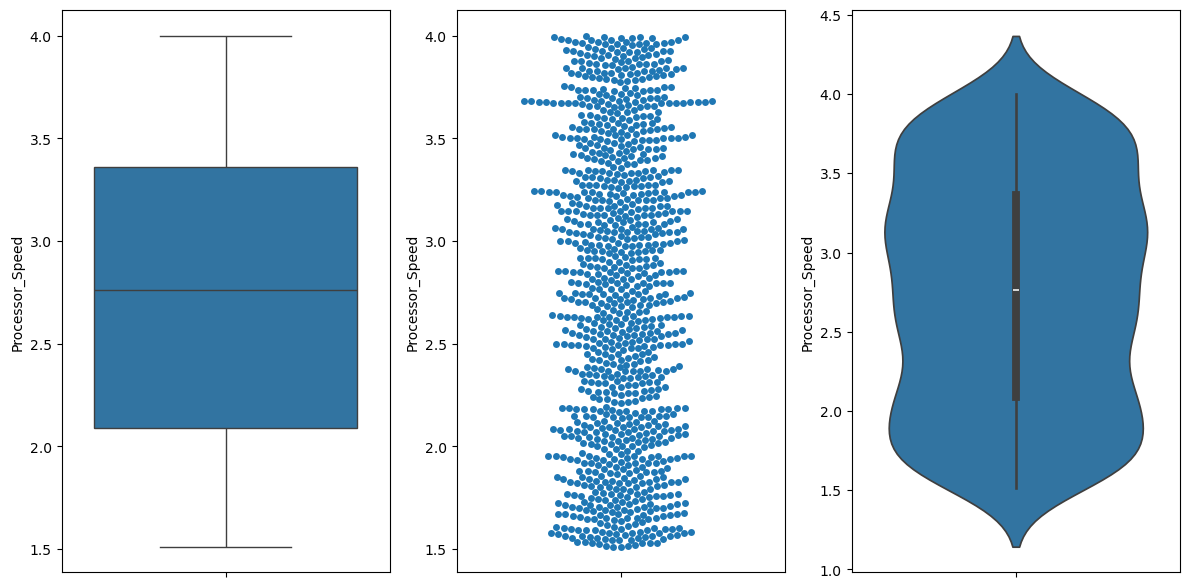

c:\Users\LENOVO\anakonda\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 85.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


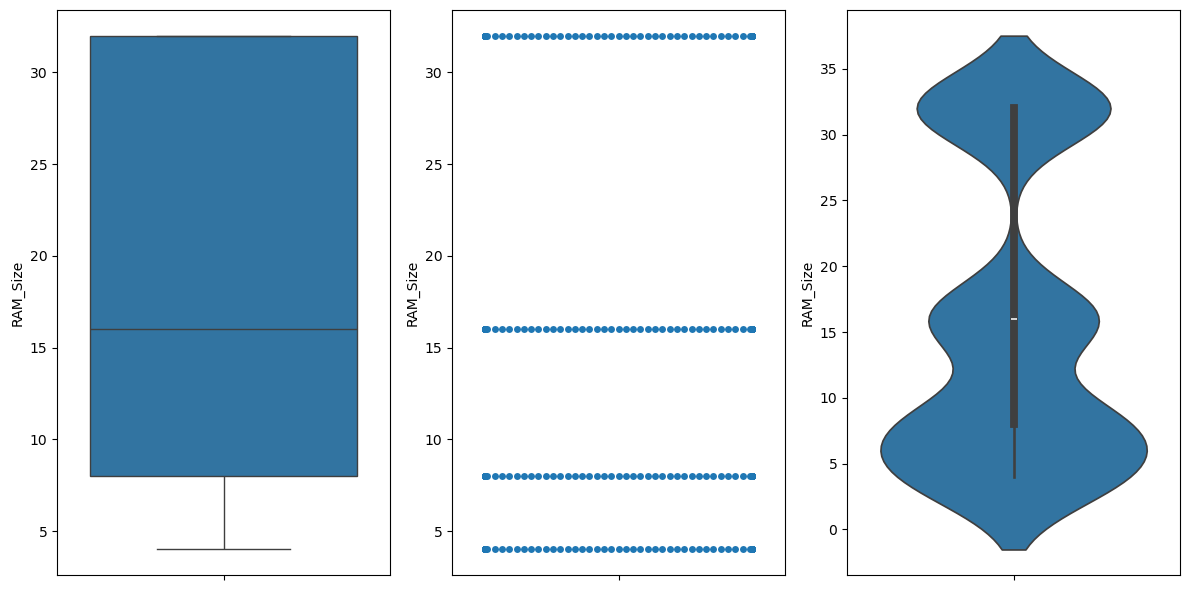

c:\Users\LENOVO\anakonda\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 18.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\LENOVO\anakonda\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 89.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


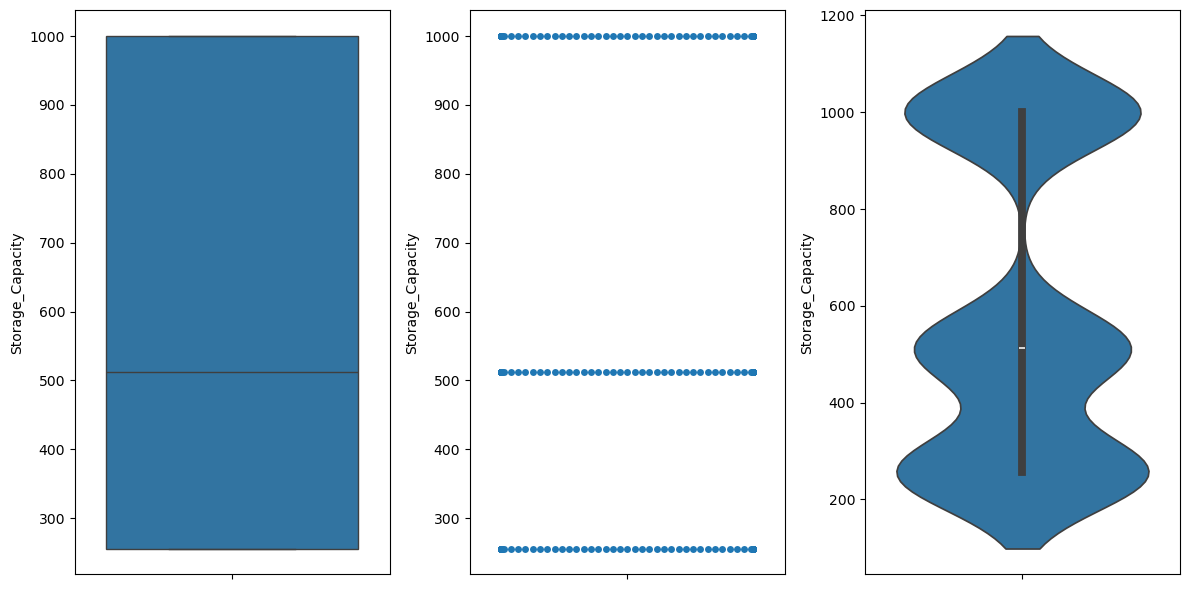

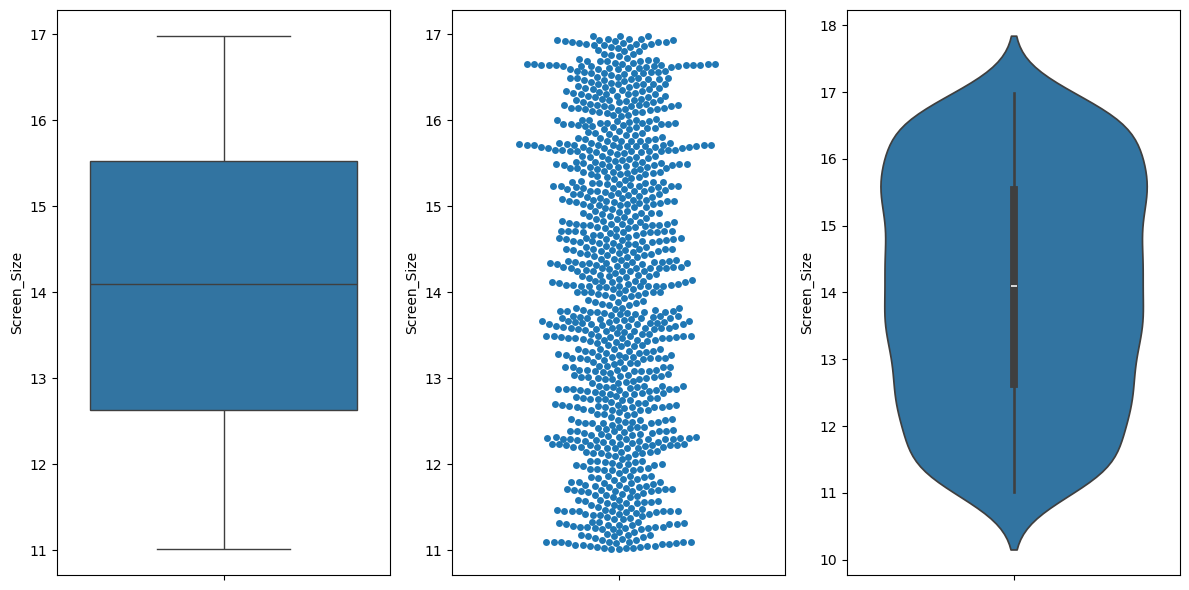

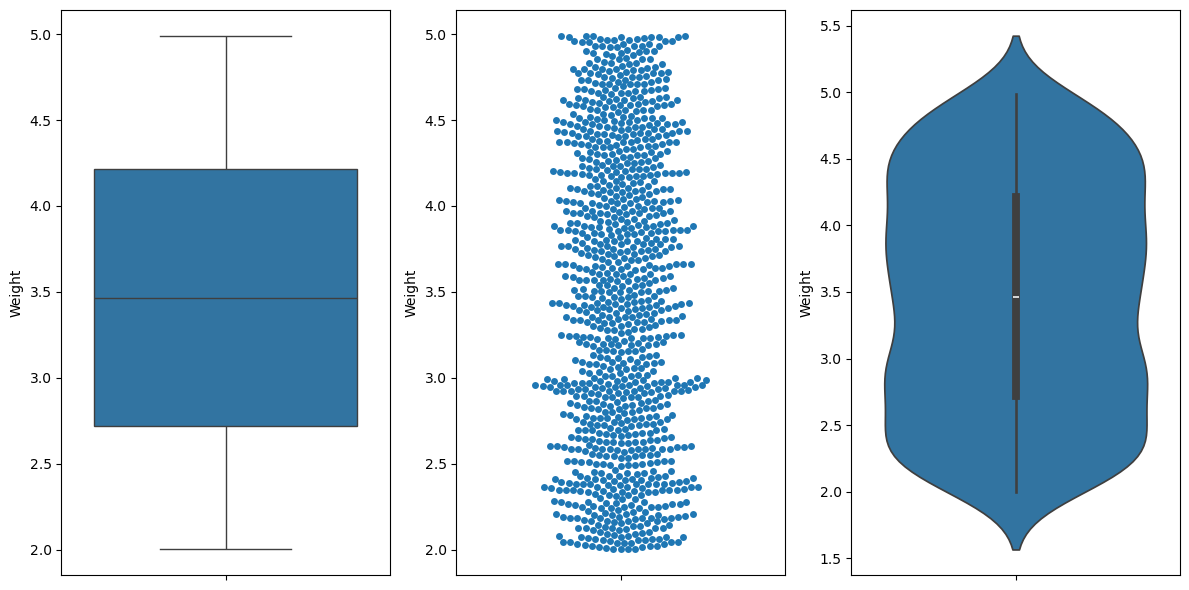

c:\Users\LENOVO\anakonda\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 30.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


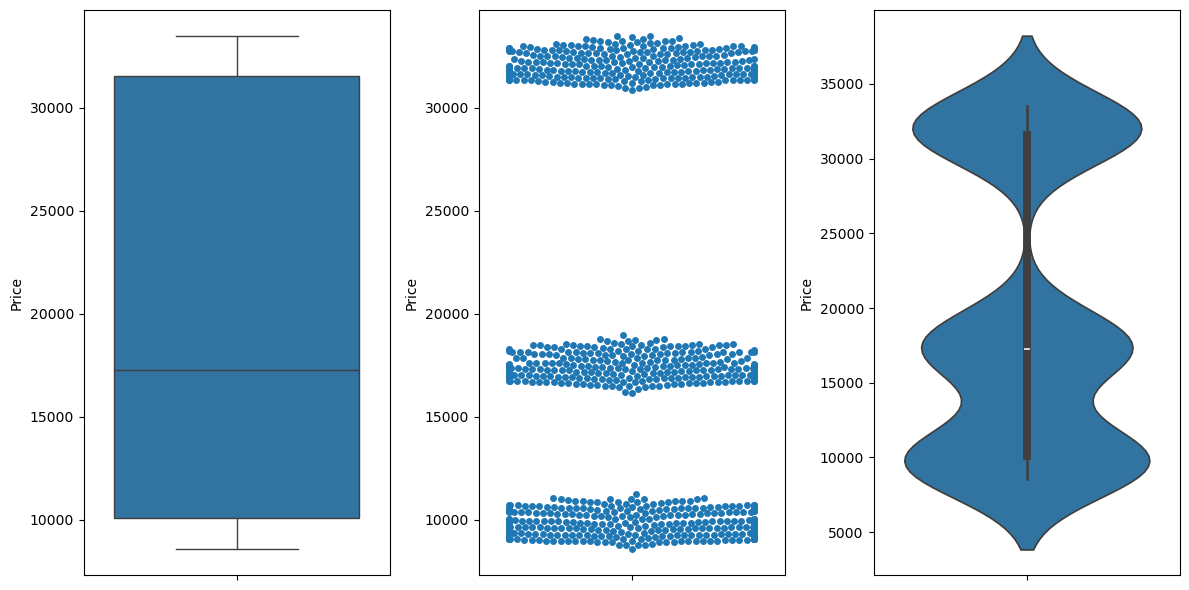

In [39]:
for col in df.select_dtypes(include='number').columns: 
    
    fig, axes = plt.subplots(1,3,figsize=(12,6))


    sns.boxplot(data=df, y=col, ax=axes[0])

    sns.swarmplot(data=df, y=col, ax=axes[1])
    
    sns.violinplot(data=df, y=col, ax=axes[2])

    plt.tight_layout()
    plt.show()


#### **Bivariate Analysis**

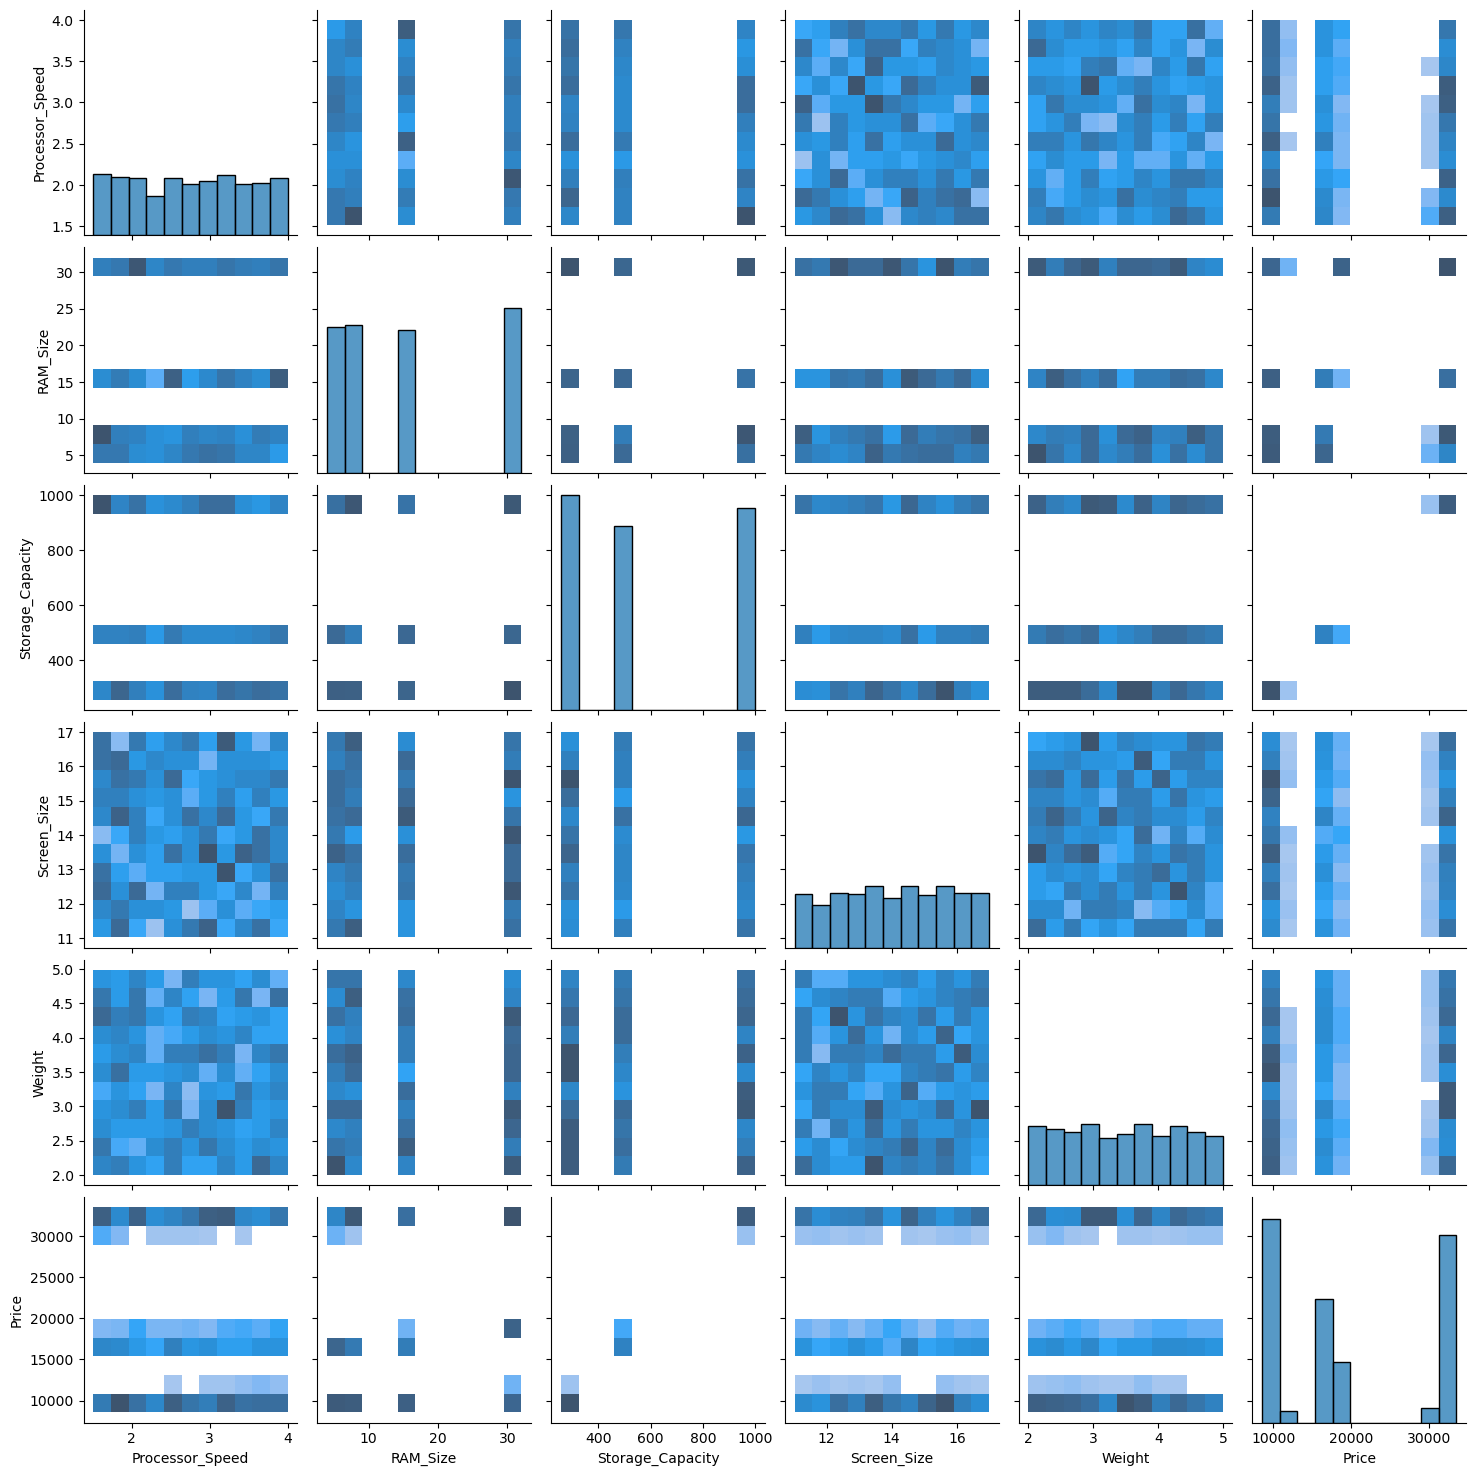

In [41]:
# show relation of 2
sns.pairplot(df, kind='hist')

<Axes: >

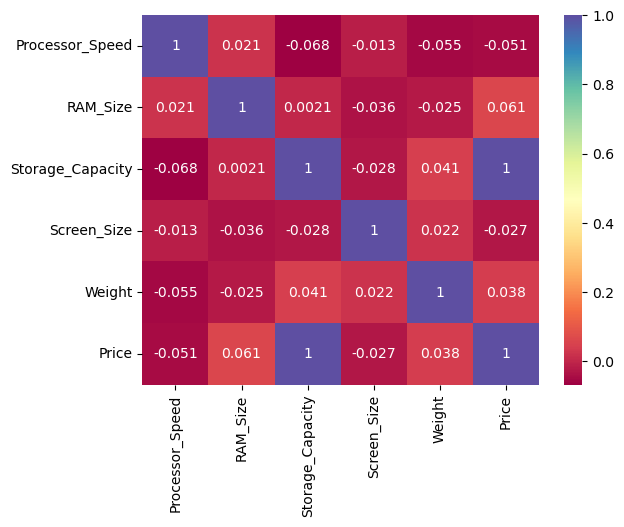

In [ ]:
# heatmap

numeric = df.select_dtypes(include='number')

sns.heatmap(data=numeric.corr(), annot=True, cmap='Spectral')

Processor_Speed    -0.050737
RAM_Size            0.061237
Storage_Capacity    0.997908
Screen_Size        -0.026740
Weight              0.038417
Price               1.000000
dtype: float64

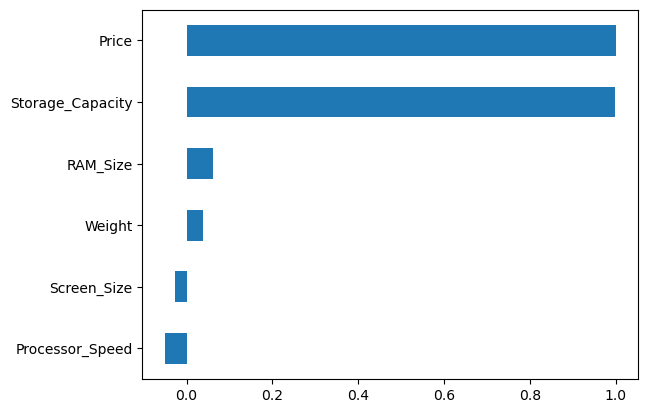

In [52]:
# relation of feature with target

target_coor = numeric.corrwith(df['Price'].sort_values())

target_coor.sort_values().plot(kind='barh')
target_coor

In [53]:
from scipy.stats import f_oneway

# Create a list of price groups, one per brand
brand_groups = [group['Price'].values for name, group in df.groupby('Brand')]

# Run ANOVA
f_stat, p_val = f_oneway(*brand_groups)
print(f"F-statistic: {f_stat:.2f}, p-value: {p_val:.4f}")


F-statistic: 0.55, p-value: 0.7024


In [54]:
df.groupby('Brand')['Price'].agg(['count', 'mean', 'median', 'min', 'max']).sort_values(by='mean', ascending=False)


,count,mean,median,min,max
Brand,,,,,
Acer,204,19984.613620,17353.422280,8931.641590,33370.442080
Lenovo,190,19974.929725,17257.951912,8780.660812,33503.935037
Asus,206,19854.238277,17157.372443,8966.377697,33239.412260
HP,190,19369.762930,17184.622587,8570.012950,33309.869501
Dell,210,18866.009978,17324.818675,8836.578529,33489.969689


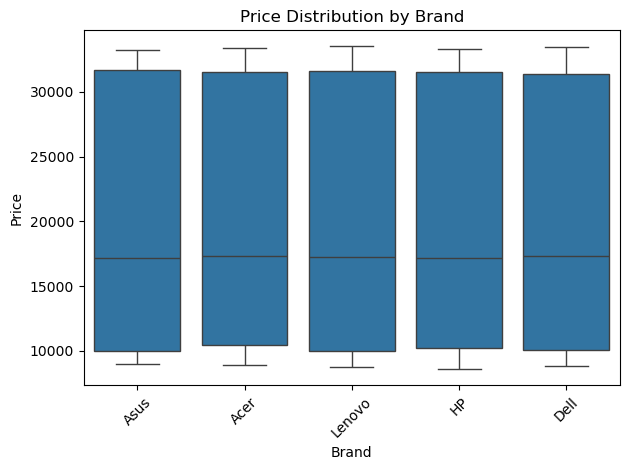

In [55]:
sns.boxplot(data=df, x='Brand', y='Price')
plt.title('Price Distribution by Brand')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()